# 1. Importazione delle librerie e download del dataset

Vengono importate le librerie necessarie per:

- elaborazione immagini (image, img_to_array)

- caricamento e visualizzazione (matplotlib)

- clustering (KMeans)

- estrazione di feature tramite rete neurale (ResNet50)

- download del dataset da Kaggle (kagglehub)

Alla fine viene scaricato il dataset e impostato il percorso della cartella contenente le immagini.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans
import kagglehub

img_dir = kagglehub.dataset_download("shuvostp/image-for-clustering") + '\\image-for-clustering\\image\\'

c:\Users\ant_5\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Estrazione delle feature da immagini con ResNet50

Si carica il modello ResNet50 pre-addestrato (senza l’ultima parte di classificazione).

///

La ResNet50 è una rete neurale profonda molto usata per analizzare immagini. È stata pre-addestrata (cioè già allenata) su un enorme dataset chiamato ImageNet, che contiene milioni di immagini suddivise in 1000 categorie (come "gatto", "cane", "automobile", ecc.).

- weights='imagenet' → carica i pesi già allenati sul dataset ImageNet.

- include_top=False → non include l’ultima parte del modello, cioè il "classificatore finale" (i layer che decidono se è un cane, un gatto, ecc.).

- pooling='avg' → dopo l’ultima convoluzione, prende la media delle feature per ottenere un vettore di output fisso (utile per confrontare le immagini tra loro).

model = Model(inputs = base_model.input, outputs = base_model.output)
- scrivere questa riga permette di usare solo la parte di ResNet che ci interessa, cioè quella che estrae le caratteristiche (feature extraction), escludendo la parte finale che normalmente fa classificazione.

///

Si definisce la funzione get_features() che:

- legge ogni immagine dalla cartella,

- la preprocessa per il modello,

- estrae le feature (vettori numerici) e le associa al nome del file.

Il risultato è una lista di feature per ogni immagine e i rispettivi nomi.

In [2]:
base_model = ResNet50(weights = 'imagenet', include_top = False, pooling = 'avg')
model = Model(inputs = base_model.input, outputs = base_model.output)

def get_features(img_dir):
    features = []
    img_name = []
    for file in os.listdir(img_dir):
        img = image.load_img(img_dir + file, target_size=(224,224))
        x = img_to_array(img)
        x = np.expand_dims(x,axis=0)
        x = preprocess_input(x)
        f = model.predict(x)
        f = f.flatten()
        features.append(f)
        img_name.append(file)
    return features, img_name

features, img_name = get_features(img_dir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

c:\Users\ant_5\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

# 3. Clustering delle immagini usando KMeans e visualizzazione dei centroidi dei cluster

- Si definisce il numero di cluster (flower_types = 3).

- Si applica KMeans sulle feature per raggruppare immagini simili.

- Viene costruito un dizionario flower_types_clusters dove per ogni cluster si associano i nomi delle immagini.

- Infine, si stampano le immagini associate a ciascun cluster.

- Si calcolano le immagini più vicine ai centroidi di ogni cluster (quella che rappresenta meglio il gruppo).

- Si trovano questi rappresentanti usando la distanza euclidea tra le feature.

- Si crea una visualizzazione separata per ogni cluster, con:

    - Il centroide mostrato per primo,

    - Le immagini del cluster disposte in una griglia ordinata.

- **Nota**: alcune immagini possono finire nel "cluster sbagliato" perché il clustering è non supervisionato e si basa solo sulla somiglianza visiva (colori, forma, sfondo), non sulle etichette reali.

2: ['hyacinth_10.jpeg', 'hyacinth_11.jpeg', 'hyacinth_14.jpeg', 'hyacinth_15.jpeg', 'hyacinth_16.jpeg', 'hyacinth_18.jpeg', 'hyacinth_19.jpeg', 'hyacinth_22.jpeg', 'hyacinth_23.jpeg', 'hyacinth_24.jpeg', 'hyacinth_25.jpeg', 'hyacinth_26.jpeg', 'hyacinth_27.jpeg', 'hyacinth_28.jpeg', 'hyacinth_29.jpeg', 'hyacinth_3.jpeg', 'hyacinth_30.jpeg', 'hyacinth_31.jpeg', 'hyacinth_32.jpeg', 'hyacinth_34.png', 'hyacinth_35.jpeg', 'hyacinth_36.jpeg', 'hyacinth_39.jpeg', 'hyacinth_4.jpeg', 'hyacinth_40.jpeg', 'hyacinth_41.jpeg', 'hyacinth_42.jpeg', 'hyacinth_43.jpeg', 'hyacinth_44.jpeg', 'hyacinth_45.jpeg', 'hyacinth_46.jpeg', 'hyacinth_48.jpeg', 'hyacinth_5.jpeg', 'hyacinth_6.jpeg', 'hyacinth_8.jpeg', 'hyacinth_9.jpeg']
0: ['hyacinth_13.jpeg', 'red rose_10.jpeg', 'red rose_11.jpeg', 'red rose_12.jpeg', 'red rose_13.jpeg', 'red rose_14.jpeg', 'red rose_15.jpeg', 'red rose_17.jpeg', 'red rose_18.jpeg', 'red rose_19.jpeg', 'red rose_20.jpeg', 'red rose_21.jpeg', 'red rose_22.jpeg', 'red rose_26.jpeg',

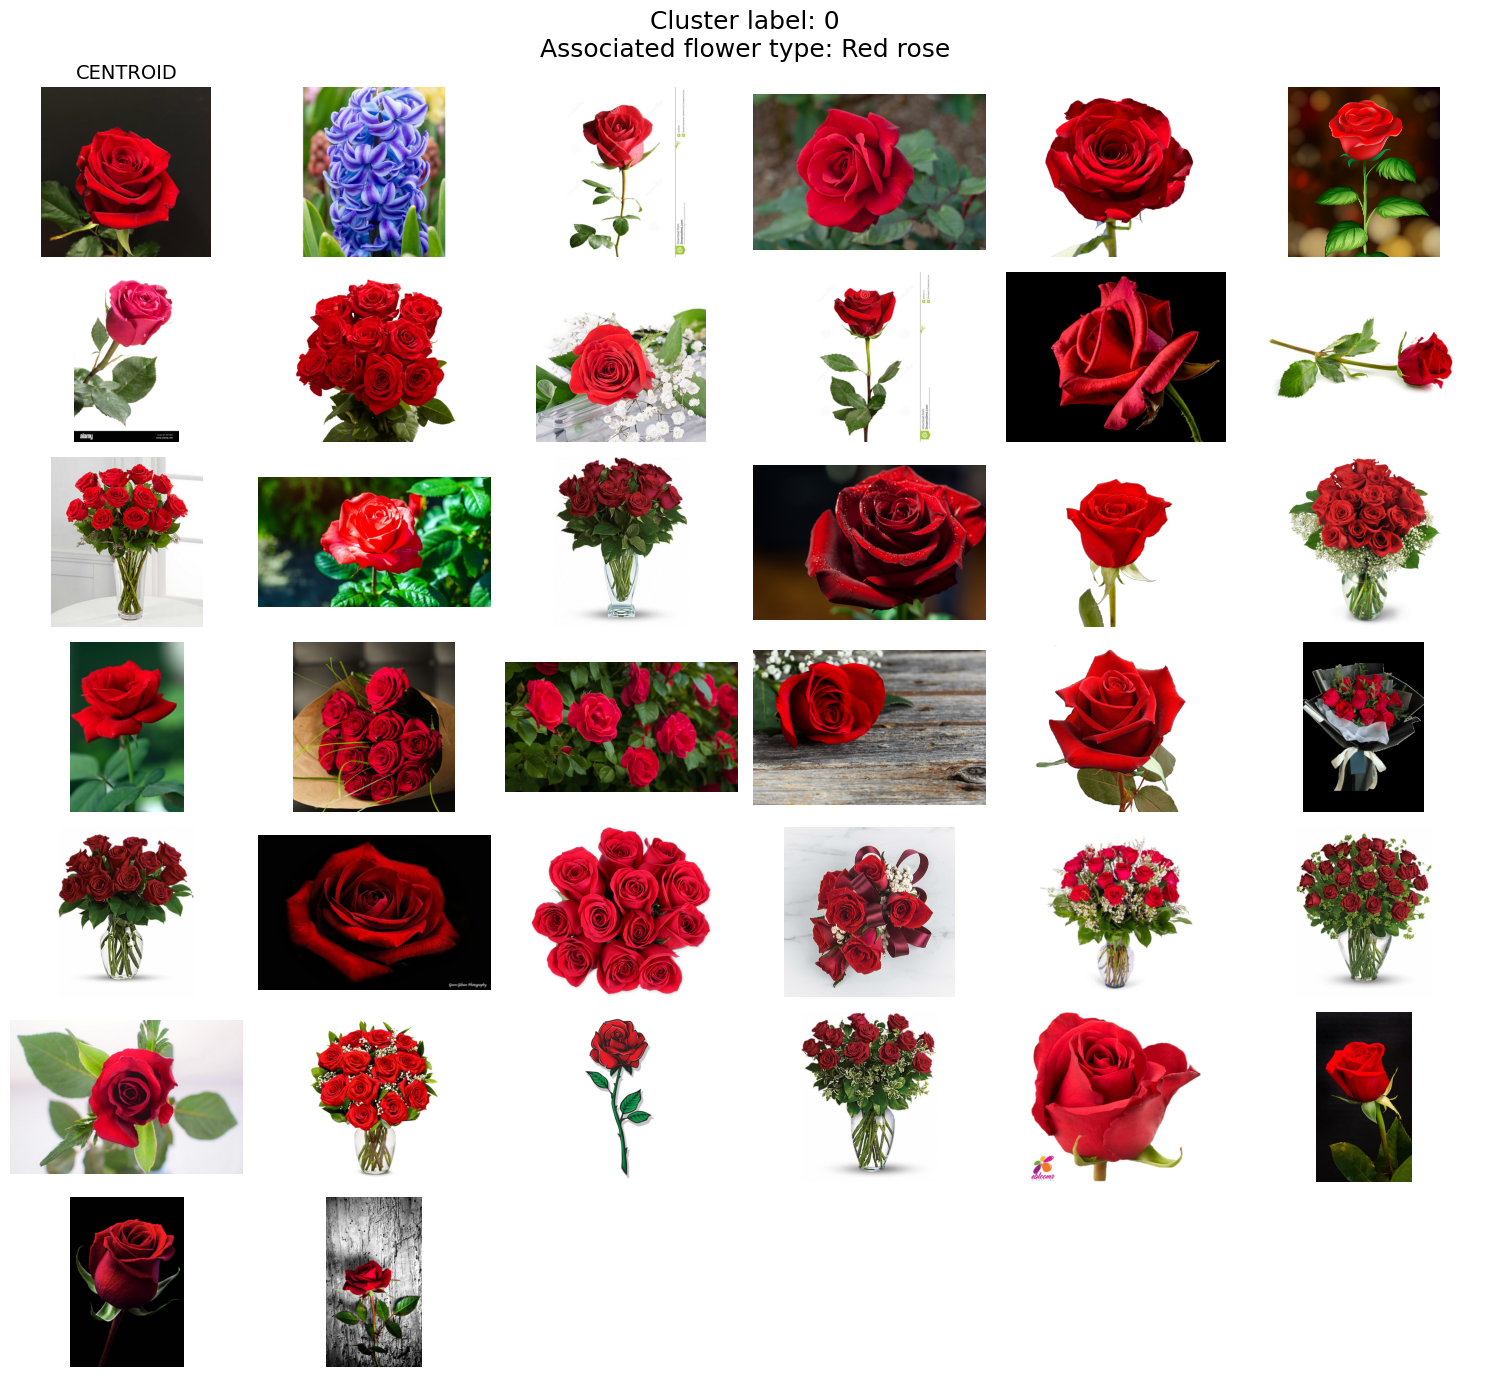

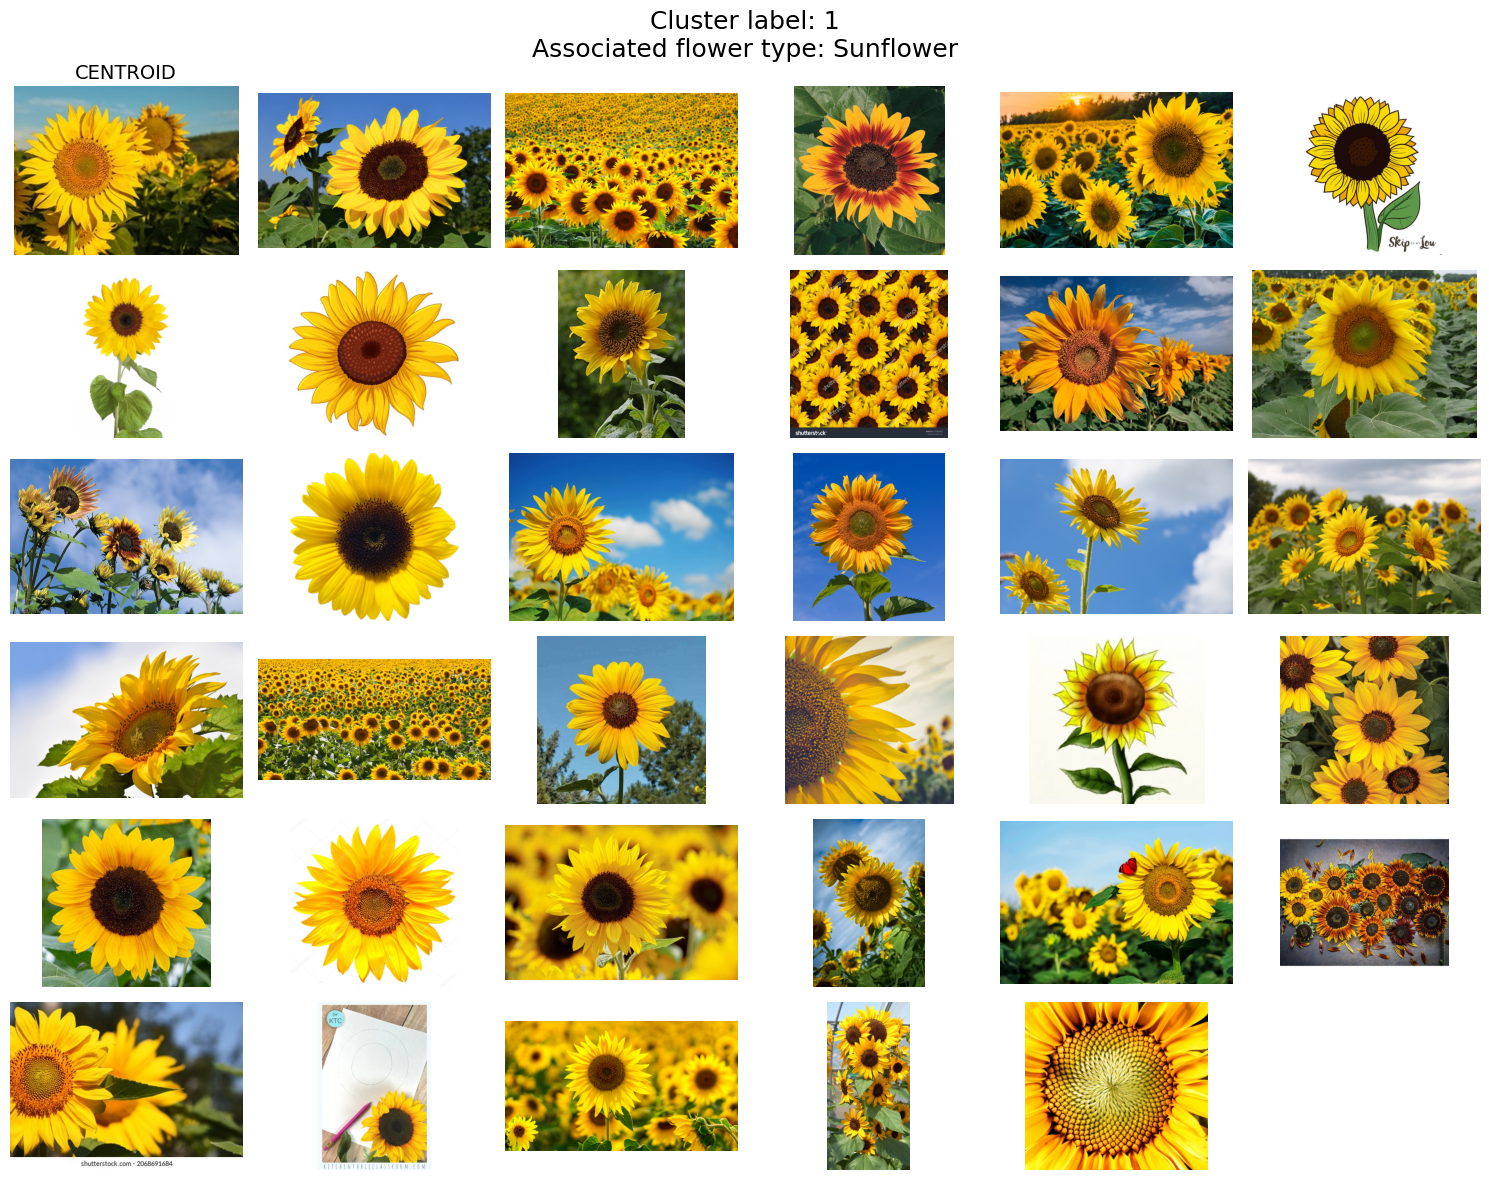

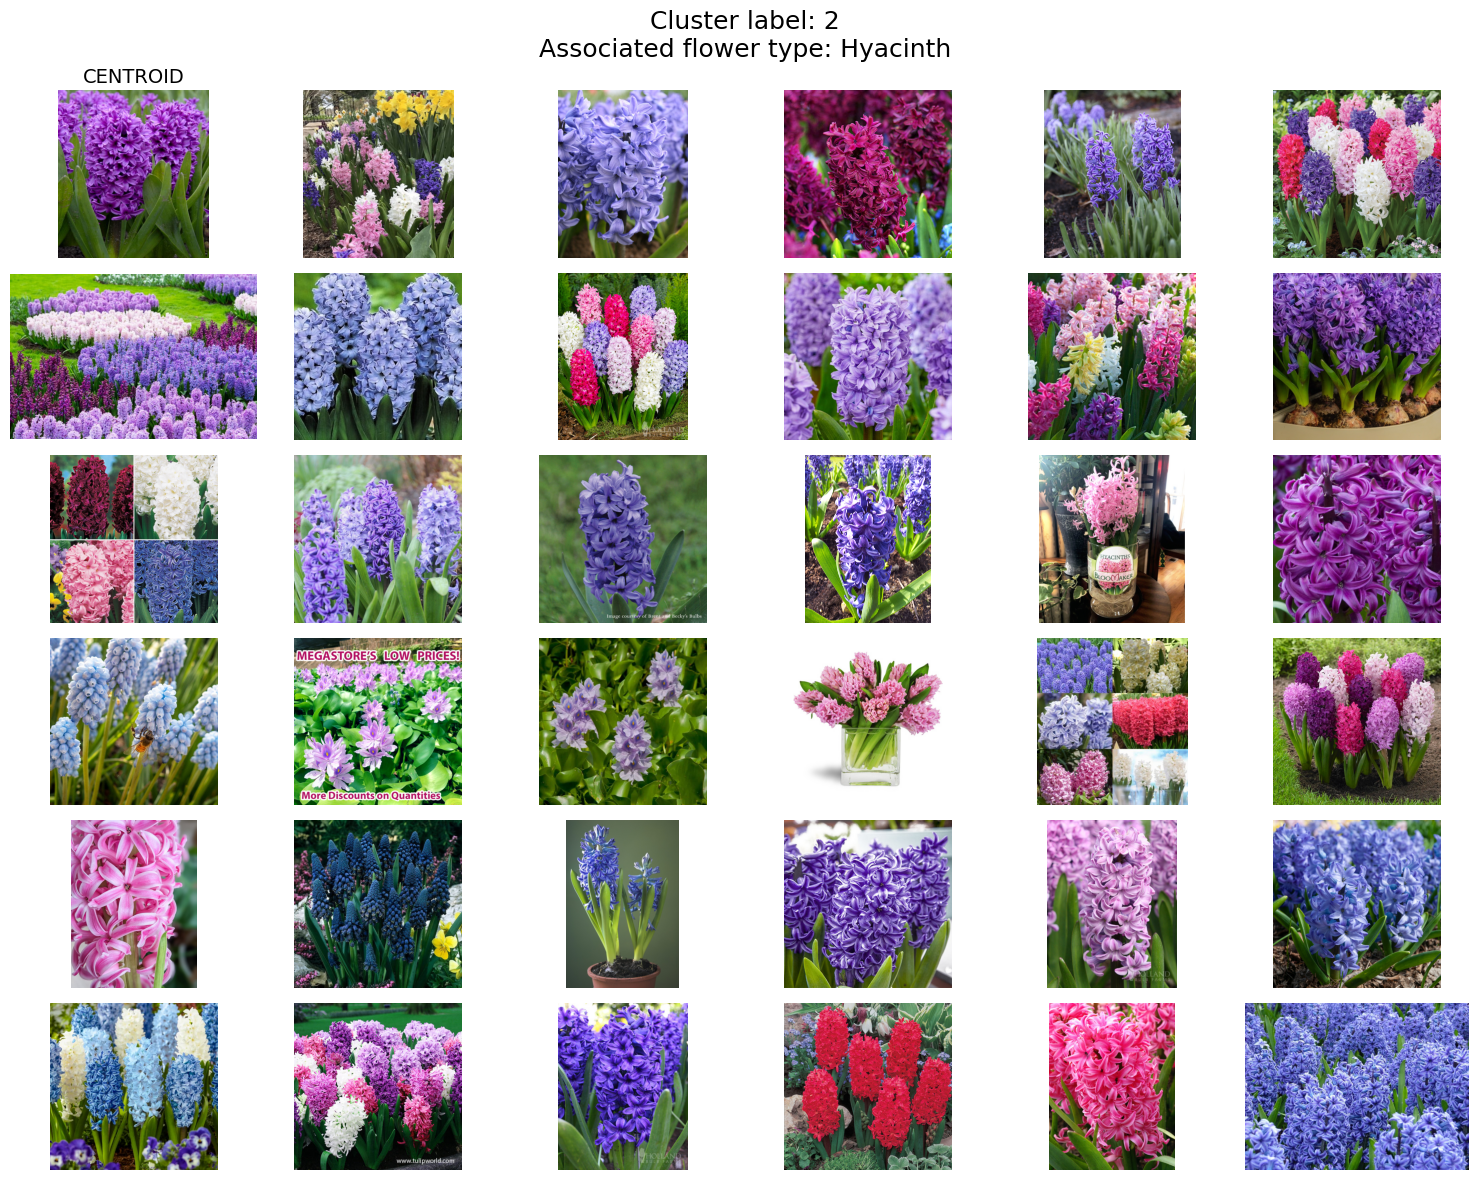

In [3]:
flower_types = 3

kmeans = KMeans(n_clusters = flower_types, random_state = 42)

kmeans.fit(features)

flower_types_clusters = {}

for i, label in enumerate(kmeans.labels_):
    img = img_name[i]
    if label not in flower_types_clusters:
        flower_types_clusters[label] = []
    flower_types_clusters[label].append(img)

for key, value in flower_types_clusters.items():
    print(f"{key}: {value}")

centers = []

for label, center in enumerate(kmeans.cluster_centers_):
    distances = np.linalg.norm(features - center, axis=1)
    closest_index = np.argmin(distances)
    centers.append(img_name[closest_index])
    flower_types_clusters[label].remove(img_name[closest_index]) 

for label in range(len(flower_types_clusters)):
    imgs = [centers[label]] + flower_types_clusters[label]
    cols = 6
    rows = (len(imgs) + cols - 1) // cols

    plt.figure(figsize=(15, 2 * rows))

    for i, file_name in enumerate(imgs):
        img = mpimg.imread(img_dir + file_name)
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        if i == 0:
            plt.title(f"CENTROID", fontsize = 14)
        plt.axis('off')

    plt.suptitle(f"Cluster label: {label}\nAssociated flower type: {file_name.split('_')[0].capitalize()}", fontsize = 18)
    plt.tight_layout()
    plt.show()